In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Программы, демонстрирующей алгоритмическую реализацию умножения Штрассена для матриц на языке Python (Цель данного вычислительного эксперимента состоит в том, чтобы убедиться в корректности работы быстрого алгоритма, опираясь на результаты «прямого» перемножения матриц. Подсчитать количество операций умножения над вещественными числами для «прямого» перемножения двух матриц размерами 256x256 и для алгоритма Штрассена).

In [ ]:
def strassen_multiply(A, B, threshold=32):
    def split(mat):
        n = mat.shape[0]
        return mat[:n//2, :n//2], mat[:n//2, n//2:], mat[n//2:, :n//2], mat[n//2:, n//2:]

    n = A.shape[0]
    if n <= threshold:
        return A @ B, n**3

    A11, A12, A21, A22 = split(A)
    B11, B12, B21, B22 = split(B)

    # Промежуточные матрицы
    M1, c1 = strassen_multiply(A11 + A22, B11 + B22)
    M2, c2 = strassen_multiply(A21 + A22, B11)
    M3, c3 = strassen_multiply(A11, B12 - B22)
    M4, c4 = strassen_multiply(A22, B21 - B11)
    M5, c5 = strassen_multiply(A11 + A12, B22)
    M6, c6 = strassen_multiply(A21 - A11, B11 + B12)
    M7, c7 = strassen_multiply(A12 - A22, B21 + B22)

    # Формирование результата
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    # Сборка матрицы
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

    return C, c1 + c2 + c3 + c4 + c5 + c6 + c7

In [ ]:
np.random.seed(42)
A = np.random.rand(256, 256)
B = np.random.rand(256, 256)

direct_ops = 256**3

result_strassen, strassen_ops = strassen_multiply(A, B)

print(f"Прямое умножение операций: {direct_ops:,}")
print(f"Штрассен операций: {strassen_ops:,}")
print("Проверка корректности:", np.allclose(A @ B, result_strassen))

Прямое умножение операций: 16,777,216
Штрассен операций: 11,239,424
Проверка корректности: True


### Программы эмпирической оценки временной сложности функции dot для умножения матриц из библиотеки NumPy (На основании построенного графика, сопоставляющего вычислительные затраты программ, сделать заключение о типах используемых алгоритмов в данной функции).


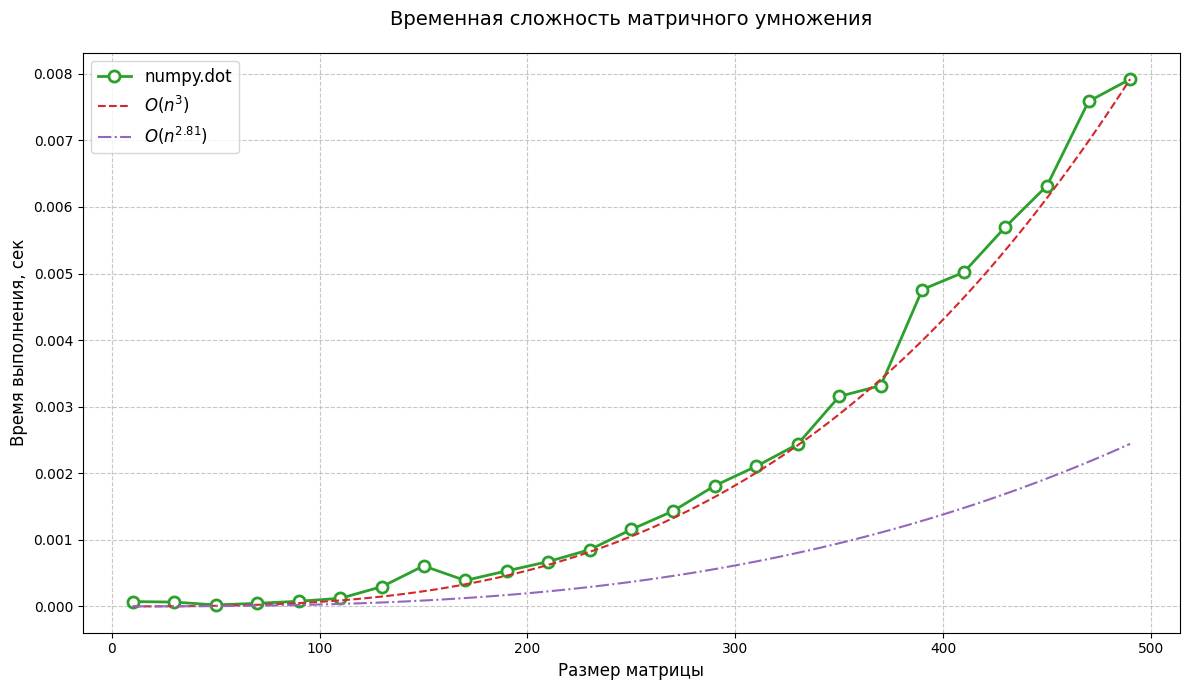

In [ ]:
sizes = np.arange(10, 501, 20)
times = []
repeats = 5

for n in sizes:
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)

    start = time.perf_counter()
    for _ in range(repeats):
        np.dot(A, B)
    elapsed = (time.perf_counter() - start) / repeats
    times.append(elapsed)

plt.figure(figsize=(12, 7))
plt.plot(sizes, times, 'o-', color='#2ca02c', linewidth=2, markersize=8,
         markerfacecolor='white', markeredgewidth=2, label='numpy.dot')

n_vals = np.linspace(min(sizes), max(sizes), 100)
scale = times[-1] / (sizes[-1]**3)
plt.plot(n_vals, scale*n_vals**3, '--', color='#d62728', linewidth=1.5, label='$O(n^3)$')
plt.plot(n_vals, scale*n_vals**2.81, '-.', color='#9467bd', linewidth=1.5, label='$O(n^{2.81})$')

plt.xlabel('Размер матрицы', fontsize=12)
plt.ylabel('Время выполнения, сек', fontsize=12)
plt.title('Временная сложность матричного умножения', pad=20, fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Программы для нахождения обратной матрицы.

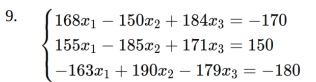

In [ ]:

A = np.array([ [168, -150, 183],
               [155, -185, 171],
               [-163, 190, -179]
             ])

try:
    A_inv = np.linalg.inv(A)
    error = np.linalg.norm(A @ A_inv - np.eye(3))
    print(f"Ошибка обращения: {error:.2e}")
    print(A_inv)
except np.linalg.LinAlgError:
    print("Матрица вырождена")

Ошибка обращения: 8.80e-14
[[-0.1298027  -1.64485981 -1.70404984]
 [ 0.02658359  0.05046729  0.07538941]
 [ 0.14641745  1.55140187  1.62616822]]


### Программы для нахождения собственных чисел и собственных векторов матрицы.

In [ ]:
A = A

eigenvalues, eigenvectors = np.linalg.eig(A)

idx = np.argmax(np.abs(eigenvalues))
v = eigenvectors[:, idx]
lb = eigenvalues[idx]
error = np.linalg.norm(A @ v - lb * v)

print(f"Максимальное собственное значение: {lb:.4f}")
print(f"Собственный вектор: {v}")
print(f"Ошибка проверки: {error:.2e}")

Максимальное собственное значение: -228.6639
Собственный вектор: [ 0.51093471  0.59939062 -0.61617905]
Ошибка проверки: 4.02e-14
